In [1]:
import pandas as pd
import requests
import re
from tqdm import tqdm
import time
import os
import glob

In [2]:

from bs4 import BeautifulSoup
  
URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
r = requests.get(URL)
  
soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7"><![endif]-->
<!--[if IE 7]><html class="no-js lt-ie9 lt-ie8 ie7"><![endif]-->
<!--[if IE 8]><html class="no-js lt-ie9"><![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   TLC Trip Record Data - TLC
  </title>
  <!--
					ls:begin[stylesheet]
				-->
  <link href="/iwov-resources/fixed-layout/3-Row Simple.css" rel="stylesheet" type="text/css"/>
  <!--
					ls:end[stylesheet]
				-->
  <!--
					ls:begin[meta-keywords]
				-->
  <meta content="" name="keywords"/>
  <!--
					ls:end[meta-keywords]
				-->
  <!--
					ls:begin[meta-description]
				-->
  <meta content="" name="description"/>
  <!--
					ls:end[meta-description]
				-->
  <!--
					ls:begin[meta-vpath]
				-->
  <meta content="" name="vpath"/>
  <!--
					ls:end[meta-vpath]
				-->
  <!--
					ls:begin[meta-page-locale-name]
				-->
  <me

In [3]:
soup = BeautifulSoup(r.content)
table = soup.find_all('a',title="Yellow Taxi Trip Records")

In [4]:
table

[<a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-02.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-03.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-04.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-05.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-06.csv" title="Yellow Taxi Trip Records">Yellow Taxi Trip Records</a>,
 <a href="https://nyc-tlc.s3.amazonaws.com/trip+data/yellow_tripdata_2021-07.csv" title="Yellow Taxi Trip Records">Yellow Taxi Tri

In [5]:
type(table)

bs4.element.ResultSet

In [6]:

links=[]
for row in table:
    match = re.search(r'href=[\'"]?([^\'" >]+)', str(row))
    if match:
        links.append(str(match.group(1)))

In [7]:
links

['https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-06.csv',
 'https://nyc-tlc.s3.amazonaws.com/trip+data/yellow_tripdata_2021-07.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-06.csv',
 'https://nyc-tlc.s3.amaz

In [8]:
pattern = r"(?P<prefix>.*)(?P<tripdata>tripdata_)(?P<year>[0-9]{4})-(?P<month>[0-9]{2})(?P<rest>.*)"
newlinks=[]
for eachlink in links:
    match=re.search(pattern,eachlink)
    year=int(match.group("year"))
    month=int(match.group("month"))
    
    if (year>=2009) and (year<2015):
        newlinks.append(eachlink)
    elif (year==2015) and (month<=6):
        newlinks.append(eachlink)

In [9]:
newlinks

['https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-06.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-01.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-02.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-03.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-04.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-05.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-06.csv',
 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2014-07.csv',
 'https://s3.amazonaws.co

In [10]:
def download_file(url):
    if not(os.path.exists("data")):
        os.mkdir("data")
    local_filename = url.split('/')[-1]
    local_filename="C:\\Users\\Kunal\\Desktop\\TFA\\data\\"+local_filename
    # NOTE the stream=True parameter below
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                # If you have chunk encoded response uncomment if
                # and set chunk_size parameter to None.
                #if chunk: 
                f.write(chunk)
    return local_filename

In [59]:
# #DO NOT RUN-----------------------------------------------------------
# for i in tqdm(range(len(newlinks))):
#     eachlink=newlinks[i]
#     download_file(eachlink)
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 78/78 [1:31:52<00:00, 70.67s/it]


In [11]:
path = "C:\\Users\\Kunal\\Desktop\\TFA\\data"
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [25]:
subset=pd.read_csv("C:\\Users\\Kunal\\Desktop\\TFA\\start.csv",on_bad_lines='skip')
df=pd.DataFrame()
mapping = {subset.columns[0]: 'vendor_name', 
           subset.columns[1]: 'Trip_Pickup_DateTime', 
           subset.columns[2]: 'Trip_Dropoff_DateTime', 
           subset.columns[3]: 'Passenger_Count',
           subset.columns[4]:'Trip_Distance', 
           subset.columns[5]:'Start_Lon', 
           subset.columns[6]:'Start_Lat',
           subset.columns[7]:'Rate_Code',
           subset.columns[8]:'store_and_forward',
           subset.columns[9]:'End_Lon',
           subset.columns[10]:'End_Lat',
           subset.columns[11]:'Payment_Type',
           subset.columns[12]:'Fare_Amt',
           subset.columns[13]:'surcharge',
           subset.columns[14]:'mta_tax',
           subset.columns[15]:'Tip_Amt',
           subset.columns[16]:'Tolls_Amt',
           subset.columns[17]:'Total_Amt'}

In [29]:
masterdf=pd.DataFrame()
for i in tqdm(range(len(csv_files))):
#     print(csv_files[i])
#     if(i<11):
#         continue
    df = df[0:0]   
    df = pd.read_csv(csv_files[i],on_bad_lines='skip')
    subset=df.sample(n=3000)
    if len(subset.columns)>18:
        subset=subset.drop(columns=["improvement_surcharge"],errors='ignore')
#         print("here")
    tempdf=subset
    tempdf.columns=mapping
    masterdf=masterdf.append(tempdf,ignore_index=True)
    subset.to_csv(r"C:\Users\Kunal\Desktop\TFA\sample\subset" +str(i)+ ".csv",index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [41:19<00:00, 31.79s/it]


In [30]:
len(masterdf)

234000

In [31]:
masterdf.to_csv("masterdf.csv",index=False)

In [32]:
masterdf.iloc[3099]

vendor_name                              CMT
Trip_Pickup_DateTime     2009-02-05 22:08:02
Trip_Dropoff_DateTime    2009-02-05 22:21:43
Passenger_Count                            1
Trip_Distance                            5.1
Start_Lon                         -73.872867
Start_Lat                          40.774334
Rate_Code                                NaN
store_and_forward                        NaN
End_Lon                           -73.949376
End_Lat                            40.762691
Payment_Type                            Cash
Fare_Amt                                14.6
surcharge                                0.0
mta_tax                                  NaN
Tip_Amt                                  0.0
Tolls_Amt                                0.0
Total_Amt                               14.6
Name: 3099, dtype: object

In [33]:
masterdf.iloc[2000]

vendor_name                              CMT
Trip_Pickup_DateTime     2009-01-15 17:42:08
Trip_Dropoff_DateTime    2009-01-15 17:52:13
Passenger_Count                            1
Trip_Distance                            1.7
Start_Lon                         -73.991146
Start_Lat                          40.733483
Rate_Code                                NaN
store_and_forward                        NaN
End_Lon                           -74.008448
End_Lat                            40.711821
Payment_Type                            Cash
Fare_Amt                                 8.3
surcharge                                0.0
mta_tax                                  NaN
Tip_Amt                                  0.0
Tolls_Amt                                0.0
Total_Amt                                8.3
Name: 2000, dtype: object

In [27]:
subset.columns

Index(['vendor_name', 'Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime',
       'Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat',
       'Rate_Code', 'store_and_forward', 'End_Lon', 'End_Lat', 'Payment_Type',
       'Fare_Amt', 'surcharge', 'mta_tax', 'Tip_Amt', 'Tolls_Amt',
       'Total_Amt'],
      dtype='object')

In [22]:
masterdf.columns=['name', 'vendor_name', 'Trip_Pickup_DateTime',
       'Trip_Dropoff_DateTime', 'Passenger_Count', 'Trip_Distance',
       'Start_Lon', 'Start_Lat', 'Rate_Code', 'store_and_forward', 'End_Lon',
       'End_Lat', 'Payment_Type', 'Fare_Amt', 'surcharge', 'mta_tax',
       'Tip_Amt', 'Tolls_Amt']

In [23]:
masterdf.columns

Index(['name', 'vendor_name', 'Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime',
       'Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat',
       'Rate_Code', 'store_and_forward', 'End_Lon', 'End_Lat', 'Payment_Type',
       'Fare_Amt', 'surcharge', 'mta_tax', 'Tip_Amt', 'Tolls_Amt'],
      dtype='object')

In [24]:
subset.columns

Index(['Unnamed: 0', 'vendor_name', 'Trip_Pickup_DateTime',
       'Trip_Dropoff_DateTime', 'Passenger_Count', 'Trip_Distance',
       'Start_Lon', 'Start_Lat', 'Rate_Code', 'store_and_forward', 'End_Lon',
       'End_Lat', 'Payment_Type', 'Fare_Amt', 'surcharge', 'mta_tax',
       'Tip_Amt', 'Tolls_Amt'],
      dtype='object')

In [12]:
yellowdf=pd.read_csv("masterdf.csv")

C:\Users\Kunal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
yellowdf.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,CMT,2009-01-13 07:54:28,2009-01-13 08:00:10,2,0.60,-73.961570,40.768545,NaN,NaN,-73.963642,40.774218,Cash,4.9,0.0,NaN,0.0,0.00,4.90
1,CMT,2009-01-22 09:02:19,2009-01-22 09:45:48,1,21.10,-73.914399,40.746171,NaN,NaN,-73.816812,40.703619,Cash,49.3,0.0,NaN,0.0,0.00,49.30
2,CMT,2009-01-23 23:52:45,2009-01-24 00:13:43,1,10.70,-73.874395,40.774010,NaN,NaN,-73.981739,40.765671,Cash,25.8,0.0,NaN,0.0,4.15,29.95
3,CMT,2009-01-06 18:34:58,2009-01-06 18:43:57,1,3.60,-73.957687,40.765477,NaN,NaN,-73.977345,40.729237,Credit,11.1,0.0,NaN,1.0,0.00,12.10
4,VTS,2009-01-02 09:52:00,2009-01-02 10:02:00,1,2.02,-74.000105,40.761962,NaN,NaN,-73.971110,40.759072,Credit,7.7,0.0,NaN,2.0,0.00,9.70


In [18]:
yellowdf["date"] = yellowdf["Trip_Pickup_DateTime"].astype("datetime64")

In [19]:
yellowdf.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt,date
0,CMT,2009-01-13 07:54:28,2009-01-13 08:00:10,2,0.60,-73.961570,40.768545,NaN,NaN,-73.963642,40.774218,Cash,4.9,0.0,NaN,0.0,0.00,4.90,2009-01-13 07:54:28
1,CMT,2009-01-22 09:02:19,2009-01-22 09:45:48,1,21.10,-73.914399,40.746171,NaN,NaN,-73.816812,40.703619,Cash,49.3,0.0,NaN,0.0,0.00,49.30,2009-01-22 09:02:19
2,CMT,2009-01-23 23:52:45,2009-01-24 00:13:43,1,10.70,-73.874395,40.774010,NaN,NaN,-73.981739,40.765671,Cash,25.8,0.0,NaN,0.0,4.15,29.95,2009-01-23 23:52:45
3,CMT,2009-01-06 18:34:58,2009-01-06 18:43:57,1,3.60,-73.957687,40.765477,NaN,NaN,-73.977345,40.729237,Credit,11.1,0.0,NaN,1.0,0.00,12.10,2009-01-06 18:34:58
4,VTS,2009-01-02 09:52:00,2009-01-02 10:02:00,1,2.02,-74.000105,40.761962,NaN,NaN,-73.971110,40.759072,Credit,7.7,0.0,NaN,2.0,0.00,9.70,2009-01-02 09:52:00


<AxesSubplot:xlabel='date'>

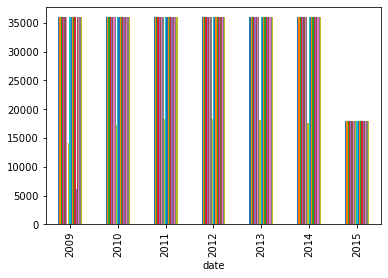

In [28]:
yellowdf.groupby(yellowdf["date"].dt.year).count().plot(kind="bar",legend=False)

<AxesSubplot:xlabel='date'>

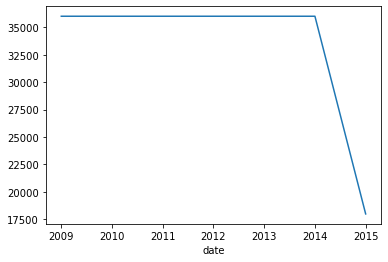

In [31]:
yellowdf.groupby(pd.to_datetime(yellowdf['date']).dt.strftime('%Y'), sort=False).size().plot()

In [32]:
len(yellowdf)

234000

In [40]:
yellowdf.dtypes.

vendor_name                      object
Trip_Pickup_DateTime             object
Trip_Dropoff_DateTime            object
Passenger_Count                   int64
Trip_Distance                   float64
Start_Lon                       float64
Start_Lat                       float64
Rate_Code                       float64
store_and_forward                object
End_Lon                         float64
End_Lat                         float64
Payment_Type                     object
Fare_Amt                        float64
surcharge                       float64
mta_tax                         float64
Tip_Amt                         float64
Tolls_Amt                       float64
Total_Amt                       float64
date                     datetime64[ns]
dtype: object